In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
mnist = pd.read_csv('mnist/mnist_train.csv')

In [5]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
value = mnist.values
value.shape

(60000, 785)

In [7]:
X = value[:,1:]
Y = value[:,0]

In [8]:
X.shape , Y.shape

((60000, 784), (60000,))

In [9]:
split = int(0.8* X.shape[0])
train_image = X[:split,:]
train_label = Y[:split]
test_image = X[split:,:]
test_label = Y[split:]

In [10]:
test_image.shape  ,test_label.shape

((12000, 784), (12000,))

In [11]:
train_image.shape , train_label.shape

((48000, 784), (48000,))

In [12]:
def drawImg(image):
    img = image.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()


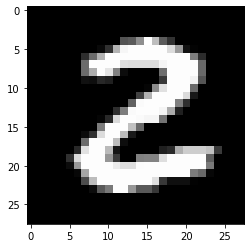

In [13]:
drawImg(train_image[25])

In [14]:
def image_split(image , row , col ):
    
    image = image.reshape(28,28)
    x , y = image.shape
    
    return (image.reshape ( x //row, row, -1, col).swapaxes(1,2).reshape(-1, row, col))

In [21]:
image_split(test_image[10],7,7).shape

(16, 7, 7)

In [33]:
def get_centroid(image):
    
    features_vector = []
 
    for img in image_split(image , 7 , 7 ) :
        summ = 0
        Xc = 0 
        Yc = 0 
    
        for index, x in np.ndenumerate(img):
            summ += x 
            Xc += x *( index[0]+1)
            Yc += x *( index[1]+1)
        
        if summ != 0 :
            features_vector.append( Xc/ summ )
            features_vector.append(Yc/ summ )
        else :
            features_vector.append(0)
            features_vector.append(0)
        
    
    return np.array(features_vector)

In [34]:
train_features = [get_centroid(img)  for img in train_image  ]
print("Ok Feature Extraction is Done")

Ok Feature Extraction is Done


In [35]:
train_features = np.array(train_features)
train_features.shape

(48000, 32)

In [36]:
test_features = [get_centroid(img)  for img in test_image  ]
print("Ok Feature Extraction is Done")

Ok Feature Extraction is Done


In [37]:
test_features = np.array(test_features)
test_features.shape

(12000, 32)

In [38]:
def dist(m1,m2):
    MSE = np.mean((m1-m2)**2)
    return MSE

In [39]:
def knn(X,Y,testfeature,k=5):
    
    results = []
    m = X.shape[0]
    tic = time.process_time()
    for i in range(m):
        d = dist(testfeature,X[i])
        results.append((d,Y[i]))
        
    results = sorted(results)            
   
    results = np.array(results[:k])
    new_results = np.unique(results[:,1],return_counts=True)
    
    index = new_results[1].argmax()
    pred = new_results[0][index]
    return pred

In [40]:
pred = knn(train_features,train_label,test_features[33])

predicted digit is: 6


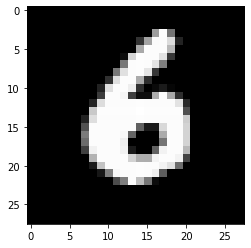

In [41]:
print('predicted digit is: {}'.format(int(pred)))
drawImg(test_image[33])

